In [1]:
pip install pandas

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/cleaned data.csv')

In [4]:
df

,Unnamed: 0,AirLine_Name,Rating - 10,Recommond,Month,Year,Day,Verified Status,Cleaned Review
0,0,AirAsia India,6.0,yes,10,2023,14,✅ Trip Verified,I had booked this fare at a very discounted ra...
1,1,AirAsia India,1.0,no,10,2023,14,✅ Trip Verified,I travel at least four times a month and Air A...
2,2,AirAsia India,10.0,yes,10,2023,14,✅ Trip Verified,Taking this opportunity to appreciate and than...
3,3,AirAsia India,1.0,no,10,2023,14,✅ Trip Verified,The worst airlines in the history of mankind. ...
4,4,AirAsia India,8.0,yes,10,2023,14,✅ Trip Verified,Would like to give big thumbs up to boarding c...
...,...,...,...,...,...,...,...,...,...
2201,2205,Vistara,8.0,yes,6,2016,15,Unknown Status,"Goa to Mumbai, and Vistara was a good experien..."
2202,2206,Vistara,6.0,yes,6,2016,15,Unknown Status,Mumbai to Bengaluru. This was my third time fl...
2203,2207,Vistara,10.0,yes,6,2016,15,Unknown Status,Flew Vistara for the first time in February fr...
2204,2208,Vistara,8.0,yes,6,2016,15,Unknown Status,Bhubaneswar to Delhi with Vistara. I had booke...


In [5]:
pip install seaborn

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df.shape

(2206, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2206 non-null   int64  
 1   AirLine_Name     2206 non-null   object 
 2   Rating - 10      2206 non-null   float64
 3   Recommond        2206 non-null   object 
 4   Month            2206 non-null   int64  
 5   Year             2206 non-null   int64  
 6   Day              2206 non-null   int64  
 7   Verified Status  2206 non-null   object 
 8   Cleaned Review   2206 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 155.2+ KB


<Axes: xlabel='Rating - 10', ylabel='count'>

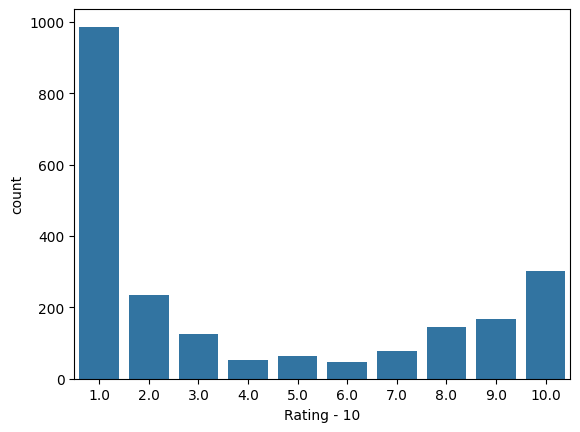

In [11]:
sns.countplot(data = df, x='Rating - 10')

#Undersampling of Reviews

In [16]:
# Group sizes
group_sizes = df['Rating - 10'].value_counts()

# Sample safely with min(n, group_size)
one = df[df['Rating - 10'] == 1.0].sample(n=min(1500, group_sizes.get(1.0, 0)))
two = df[df['Rating - 10'] == 2.0].sample(n=min(500, group_sizes.get(2.0, 0)))
three = df[df['Rating - 10'] == 3.0].sample(n=min(500, group_sizes.get(3.0, 0)))
four = df[df['Rating - 10'] == 4.0].sample(n=min(500, group_sizes.get(4.0, 0)))
five = df[df['Rating - 10'] == 5.0].sample(n=min(1500, group_sizes.get(5.0, 0)))


In [17]:
undersampled_reviews = pd.concat([one, two, three, four, five], axis=0)

In [18]:
undersampled_reviews['Rating - 10'].value_counts(dropna=False)

,count
Rating - 10,
1.0,986
2.0,235
3.0,126
5.0,65
4.0,53


<Axes: xlabel='Rating - 10', ylabel='count'>

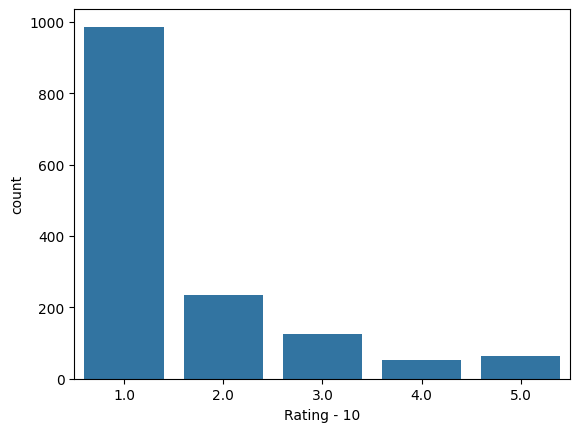

In [19]:
sns.countplot(data=undersampled_reviews, x='Rating - 10')

In [20]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [21]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [28]:
import nltk

# Download the necessary NLTK resources
nltk.download('punkt')  # Download punkt sentence tokenizer
nltk.download('punkt_tab')  # Download punkt sentence tokenizer

def get_sentiment_score(text):
    # Example tokenization process using nltk
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # Replace with actual sentiment scoring logic
    return len(tokens)

# Apply the function to your DataFrame
df['swn_score'] = df['Cleaned Review'].apply(lambda text: get_sentiment_score(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [31]:
df[['Cleaned Review','swn_score']].sample(1)

,Cleaned Review,swn_score
1022,Bad experience. They did not serve corporate meal to me. I asked them before landing then they come with some meal available. They serve this 15 min before landing and served when I asked for it. I observed there attention is on who are passenger who are buying meals. Even served food are not sufficient. Flight is also delayed by 1 hour. Don't want to fly again with them.,78


In [34]:
df['swn_sentiment'] = df['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [35]:
df['swn_sentiment'].value_counts(dropna=False)

,count
swn_sentiment,
positive,2206


<Axes: xlabel='Rating - 10', ylabel='count'>

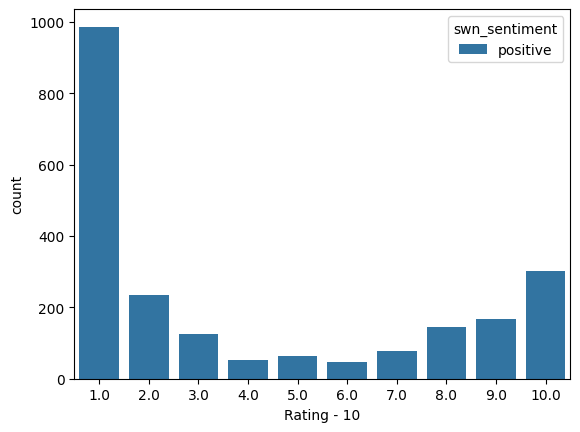

In [36]:
sns.countplot(x='Rating - 10', hue='swn_sentiment' ,data = df)

<Axes: xlabel='swn_sentiment', ylabel='Rating - 10'>

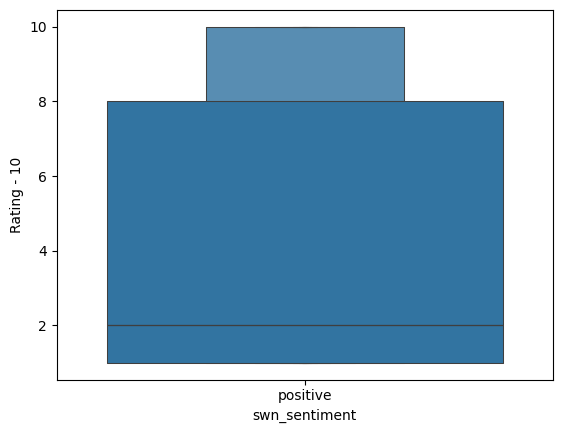

In [38]:
sns.boxenplot(x='swn_sentiment', y='Rating - 10', data = df)

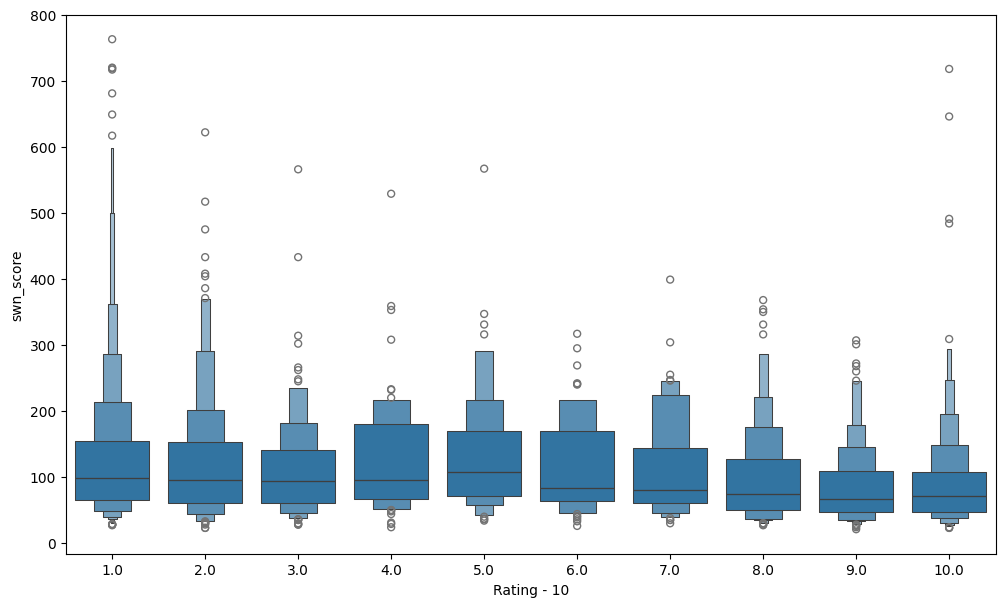

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='Rating - 10', y='swn_score', data = df, ax=ax)
plt.show()

In [41]:
df['true_sentiment'] = \
    df['Rating - 10'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [42]:
y_swn_pred, y_true = df['swn_sentiment'].tolist(), df['true_sentiment'].tolist()

In [43]:
len(y_swn_pred), len(y_true)

(2206, 2206)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

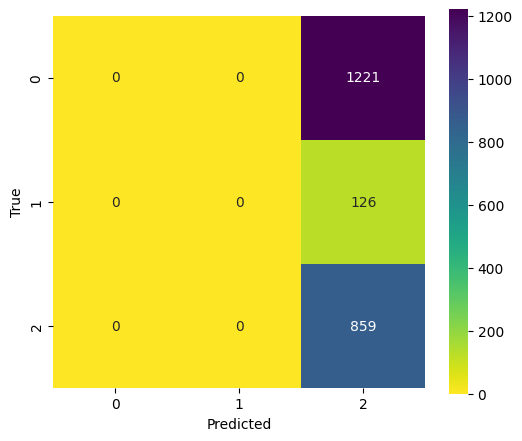

In [46]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

Positive Sentiment Prediction Assessment

In [47]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [48]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [49]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precission: 0.5957253296953161
f1 score: 0.6241067174845164
